In [1]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df=pd.DataFrame(data.data)

In [12]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target']=data.target

In [20]:
df['target_names']=df.target.apply(lambda x: data.target_names[x])

In [21]:
df.head()

,0,1,2,3,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
df.to_csv('iris_data.csv')

In [24]:
x=df.drop(['target','target_names'], axis='columns')
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [38]:
len(x_test)

30

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()     #default with n_estimators=10 (mean 10 trees)
model.fit(x_train,y_train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
model.score(x_test,y_test)

1.0

In [41]:
model1=RandomForestClassifier(n_estimators=40)     # with n_estimators=20 (mean 20 trees)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
model.score(x_test,y_test)

1.0

In [43]:
y_predicted=model1.predict(x_test)

In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[15,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  9]], dtype=int64)

Text(24.0, 0.5, 'truth')

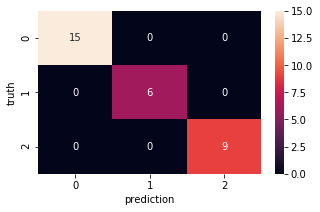

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(5,3))
sb.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')